# Bike Sharing Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Objectives

Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Data understanding

**`day.csv`** file contains the following features

Column Name   |   Description
-------- | --------------
**` instant`** | record index
**` dteday `** | date
**` season `** | season : 1) spring, 2) summer, 3) fall, 4) winter |
**` yr `** | year (0 - 2018, 1 - 2019)
**` mnth `** | month ( 1 to 12)
**` holiday `** | weather day is a holiday or not (extracted from http//dchr.dc.gov/page/holiday`schedule)
**` weekday `** | day of the week
**` workingday `** | if day is neither weekend nor holiday is 1, otherwise is 0.
**` temp `** | temperature in Celsius
**` atemp`** | feeling temperature in Celsius
**` hum`** | humidity
**` windspeed`** | wind speed
**` casual`** | count of casual users
**`registered`** | count of registered users
**` cnt`** | count of total rental bikes including both casual and registered
**` weathersit `** | 1) Clear, Few clouds, Partly cloudy, Partly cloudy. 2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. 3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 4) Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### 1.1 Importing Necessary Libraries

In [76]:
# Numerical and Data Analysis
import pandas as pd
import numpy as np

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extra
import warnings
warnings.filterwarnings('ignore')

#Scaling features library
from sklearn.preprocessing import MinMaxScaler

#Linear Model Library
import statsmodels.api as sm

#Metric libraries
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## 1.2 Data Loading

In [77]:
#read the data from day.csv file located in the same directory
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [78]:
#List the Rows and Columns count
df.shape

(730, 16)

In [79]:
#describe the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observations of Data Set

1. Total number of columns in the dataset are 16
2. Total number of rows in the dataset are 730
3. All columns are non-null and will not have any null values. We can ignore performing the null check.
4. Out of 16 columns, 11 columns are belongs to Int64, 4 columns are belongs to float and 1 column belongs to object data types.

## 2. Data Check

## 2.1 Duplicate Check

In [80]:
df_duplicates = df.duplicated()
df_duplicates[df_duplicates==True]

Series([], dtype: bool)

### Observations 
There are no duplicate records found and data is in good shape to proceed with further analysis.

## 2.1 Remove unuseful columns

- Instant: This field represents index field and each row will have unique value and doesn't useful for the model
- dteday: Entire data is based on day basis. Hence dteday column represents the date of reach row and it has unique values acorss and doesn't useful for ML models due to no patterns and relationships.
- Casual and Registered: Both field contains the counts. Sum of Casual and Registered counts are record in a seperate field Cnt. Sinece the two fields data is representing already by Cnt column, its better to remove the two columns to avoid the multicolinearity. 

In [81]:
#lets remove unuseful 
df= df.drop(['instant','dteday','casual','registered'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## 3. EDA Analysis

### 3.1 Seggregate Numerical and Categorical Features

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [83]:
#numerical features are as follows
num_features=['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']

### Observation: 
- There are no categorical variables. All are numerical variables.

## 3.2 Univariate Analysis

Numerical Data analysis using Histogram Plot

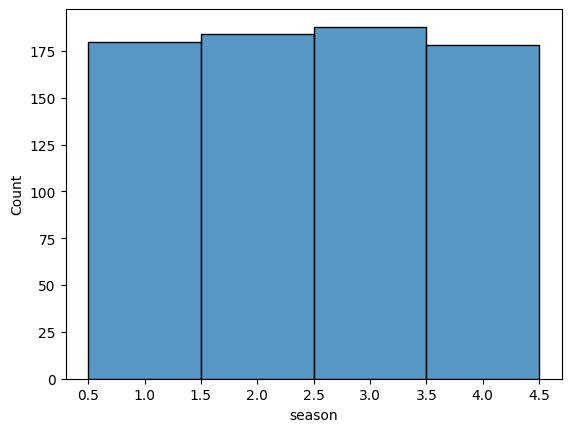

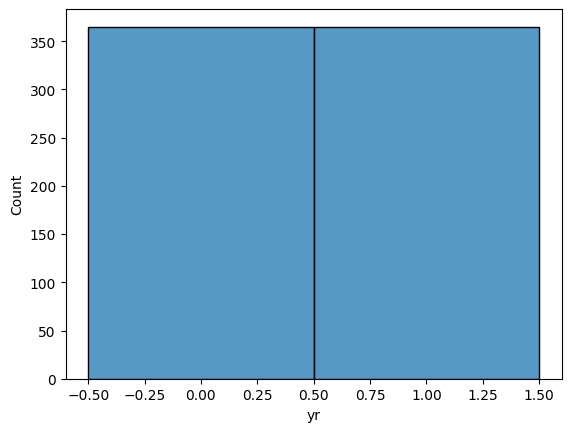

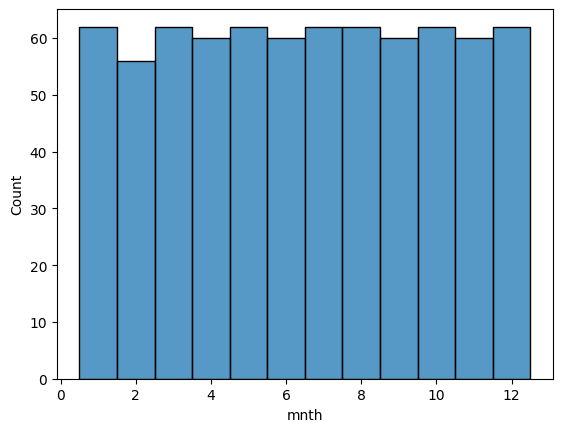

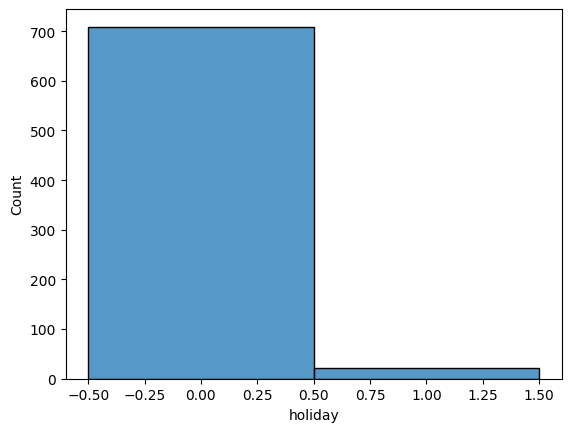

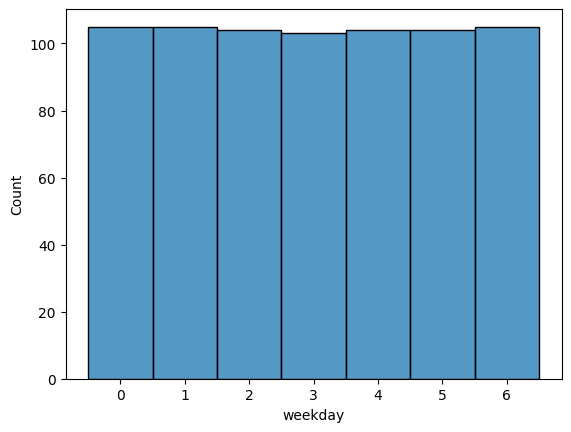

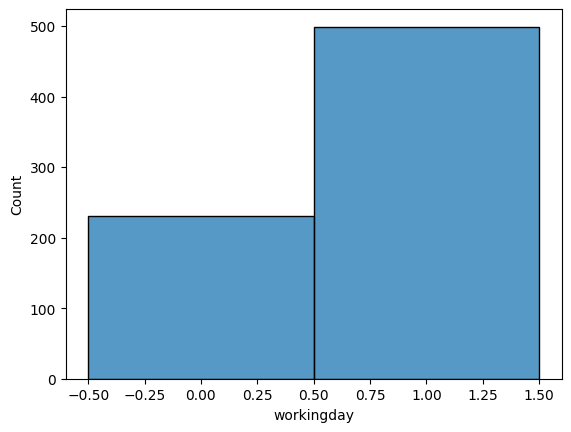

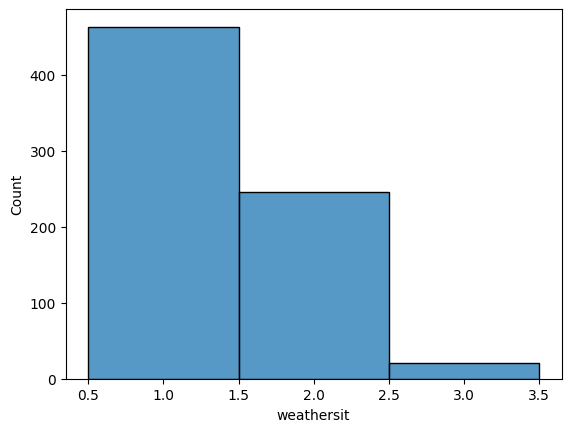

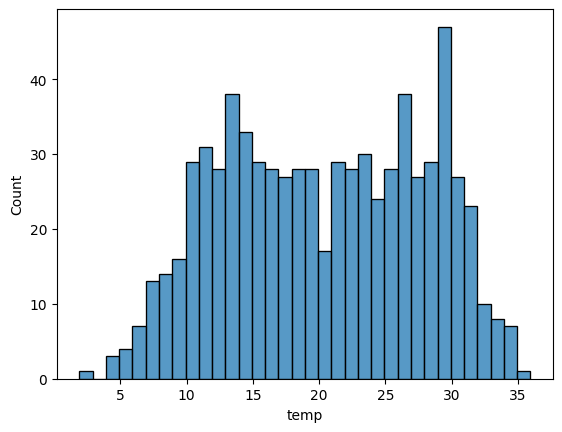

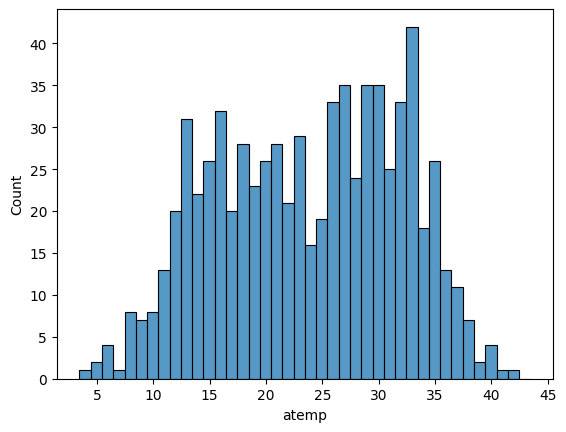

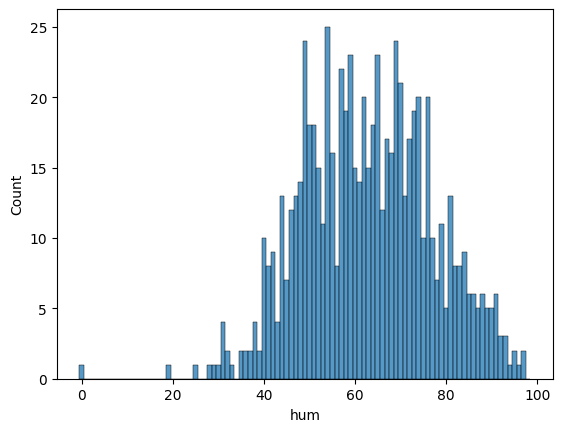

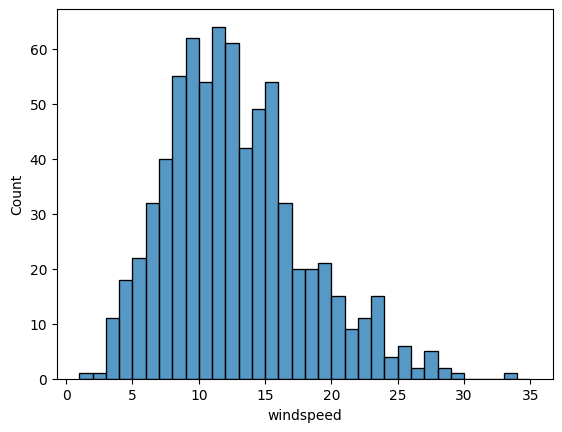

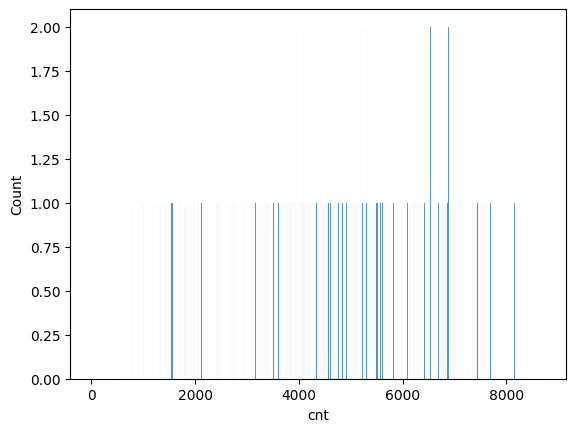

In [84]:
for i in num_features:
    sns.histplot(df[i],discrete=True)
    plt.show()

### Observations:
- Season: All four seasons are more or less equally distributed.
- Year: Two years data are equally distributed
- Month, weekday: Data is equally distributed
- Holiday: There are less number (<25) of holidays across two years and more number of non-holidays (>700) 
- Workingday: There are less number (<250) of non working days and more number of working days (<500)across two years
- Weathersit: Observed that there are no bike sharing count exists for Weathersit 4. Its due to no one will go out when whether is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
Bike Sharing in Weather 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) count stays in the top list.
- Temp: Between temperature 10 to 30, there are good counts of bike sharing
- aTemp: Between Atemperature 12 to 35, there are good counts of bike sharing
- hum: Between humidity 40 to 85, there are good counts of bike sharing
- windspeed: Between windspeed of 5 to 20, there are good counts of bike sharing

##### Numerical Data analysis using BOX Plot

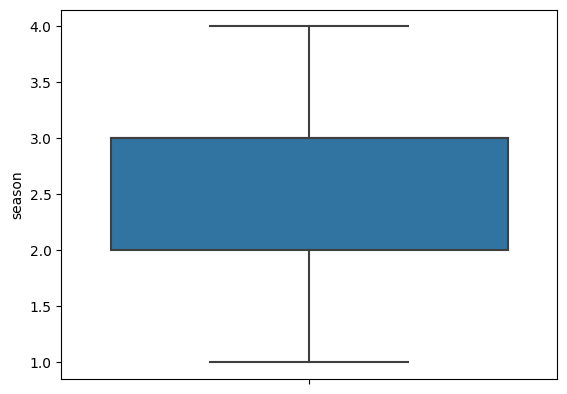

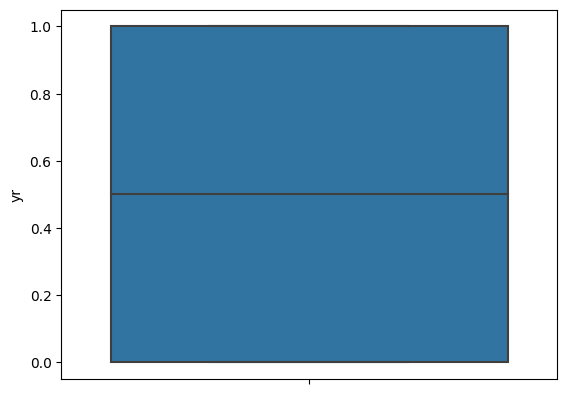

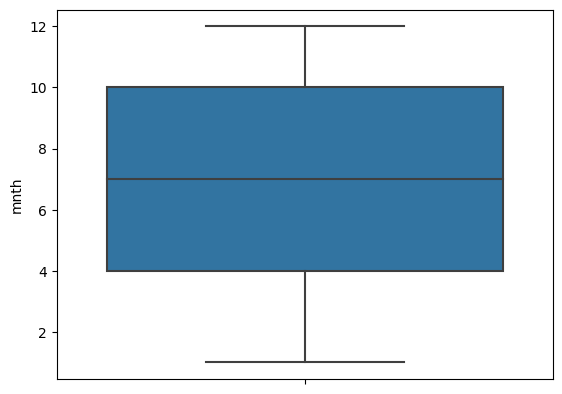

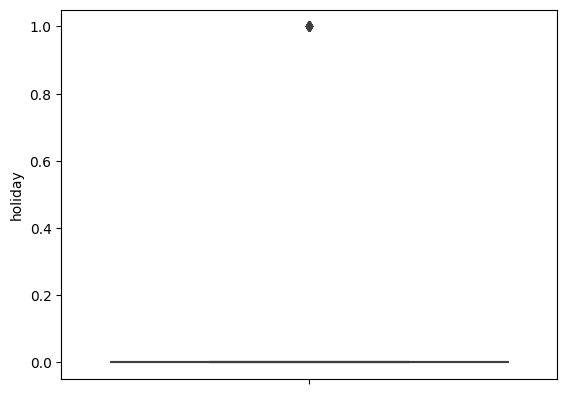

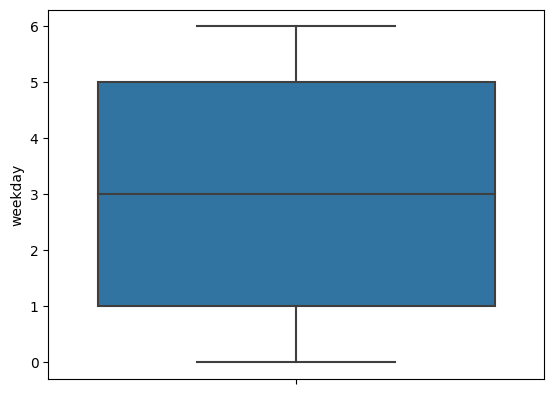

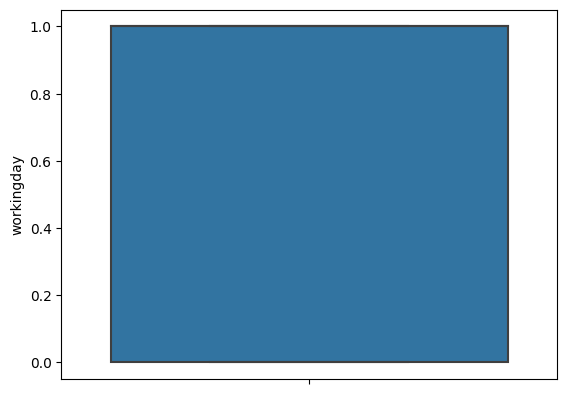

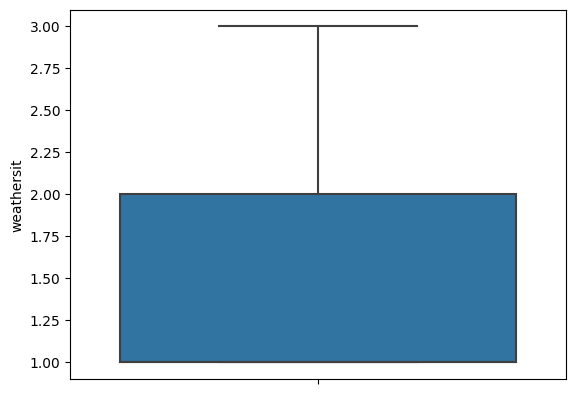

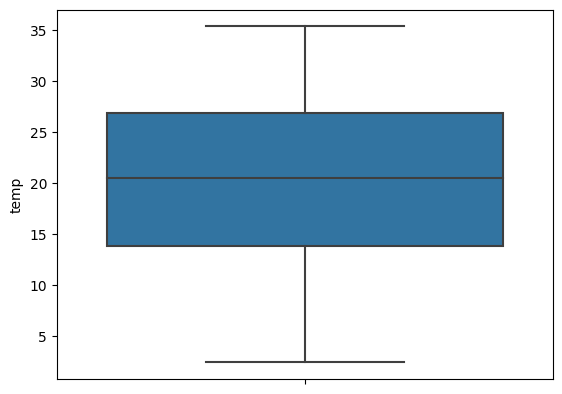

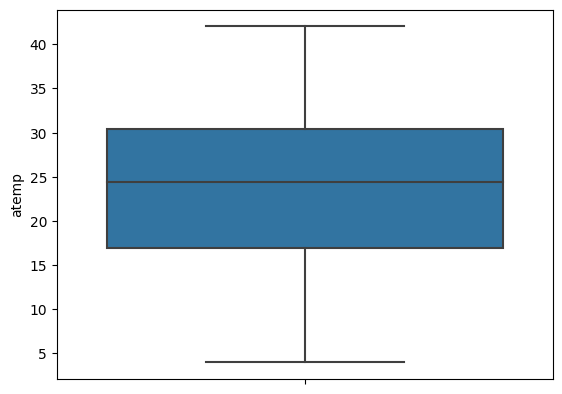

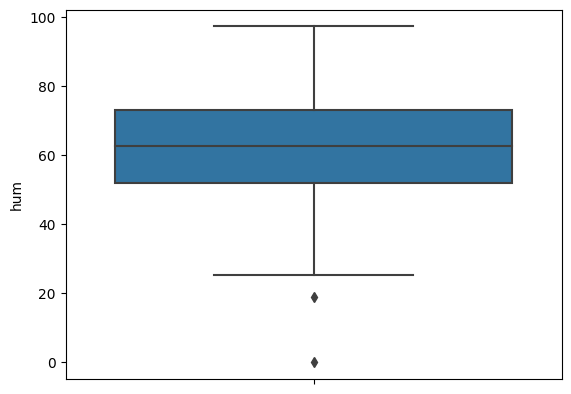

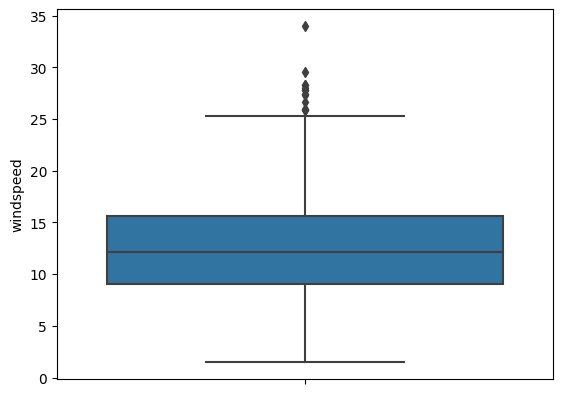

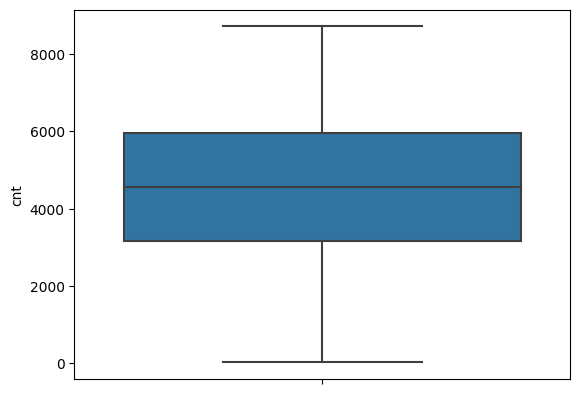

In [85]:
for i in num_features:
    sns.boxplot(y=df[i])
    plt.show()

### Observations:
Boxplots are not to provide significance patterns or userful information

##### Numerical Data analysis using Scatter Plot

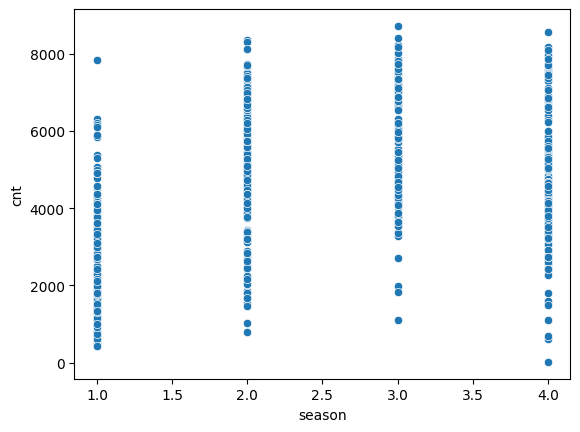

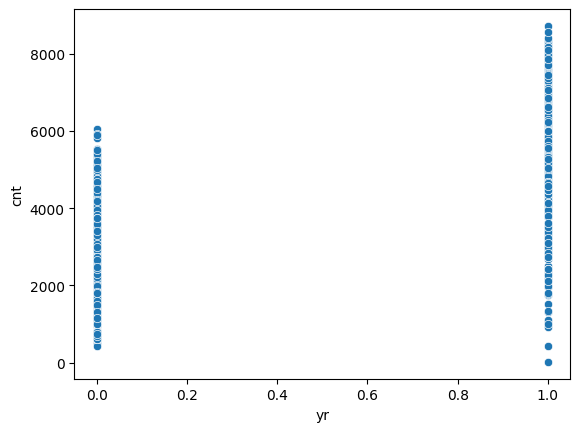

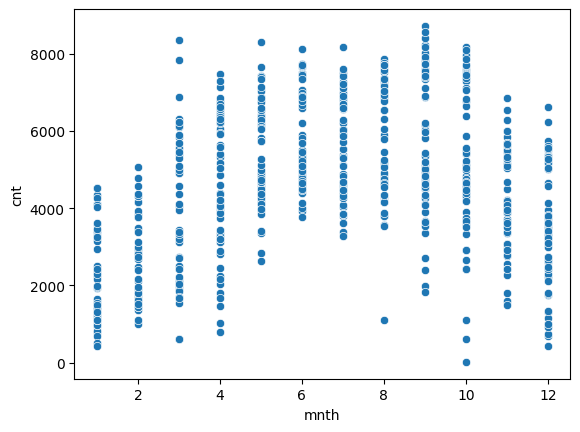

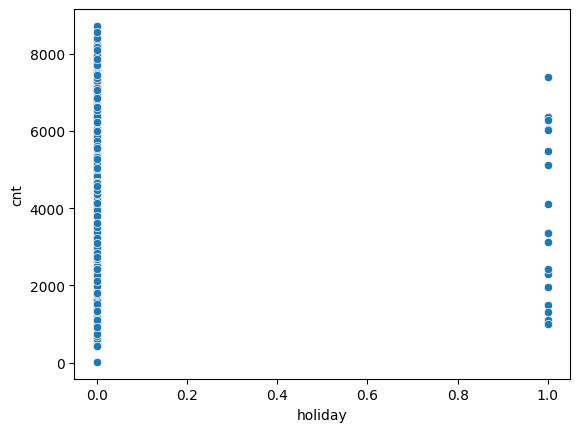

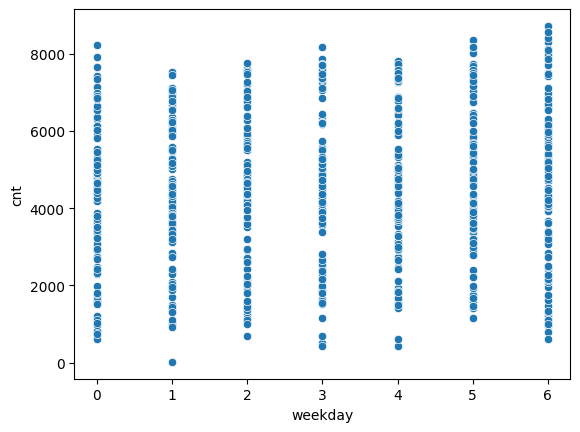

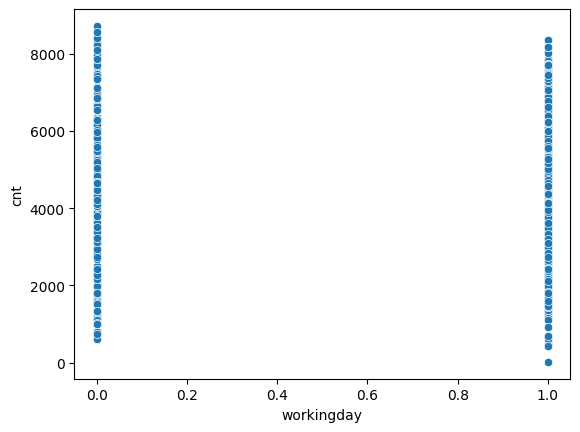

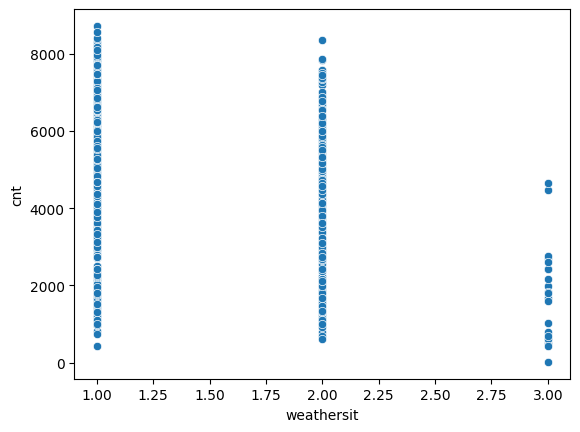

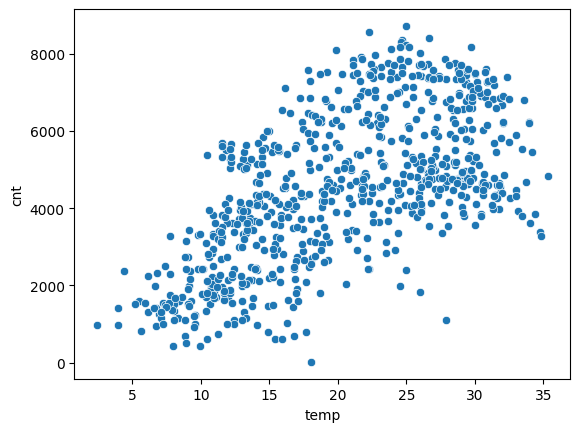

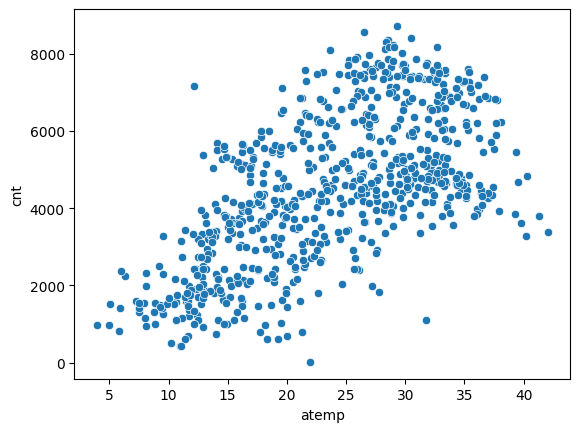

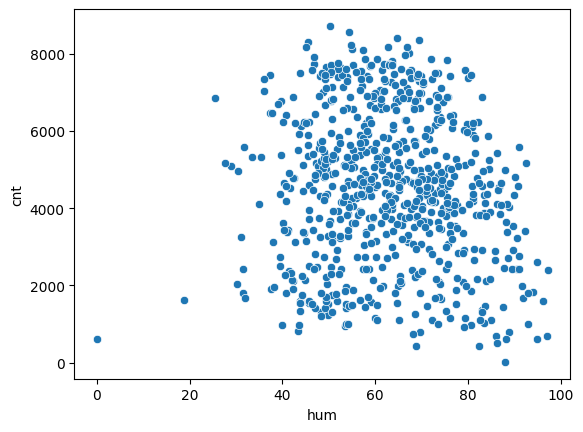

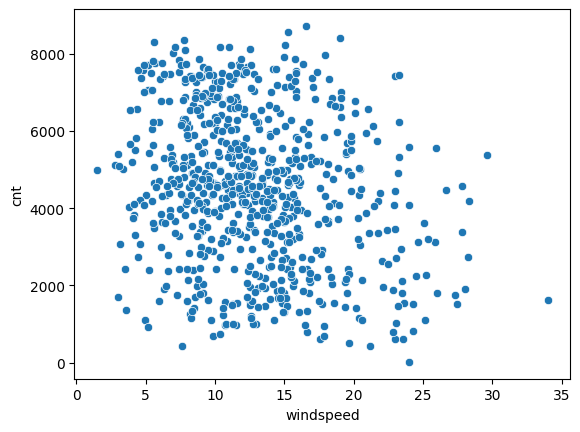

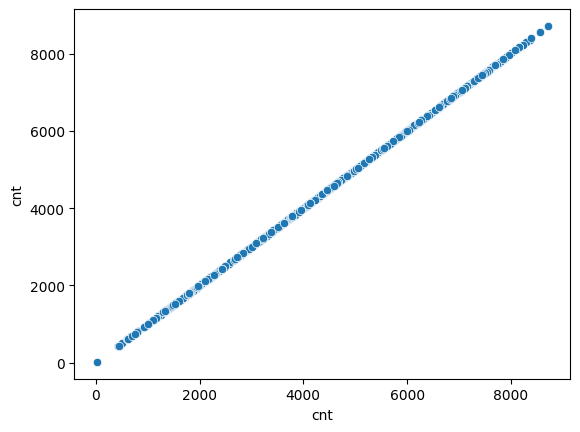

In [86]:
for i in num_features:
    sns.scatterplot(x=df[i],y=df.cnt)
    plt.show()

### Observation: 
Temp and ATemp:
There is a positive correlation when temperature increases the count of bike sharing increases.
Humidity: 
There is a negative correlation when humidity increases the count of bike sharing decreases.

Apart from above, other features are not showing any significant pattern from scatter plots.

##### Numerical Data analysis using pair Plot

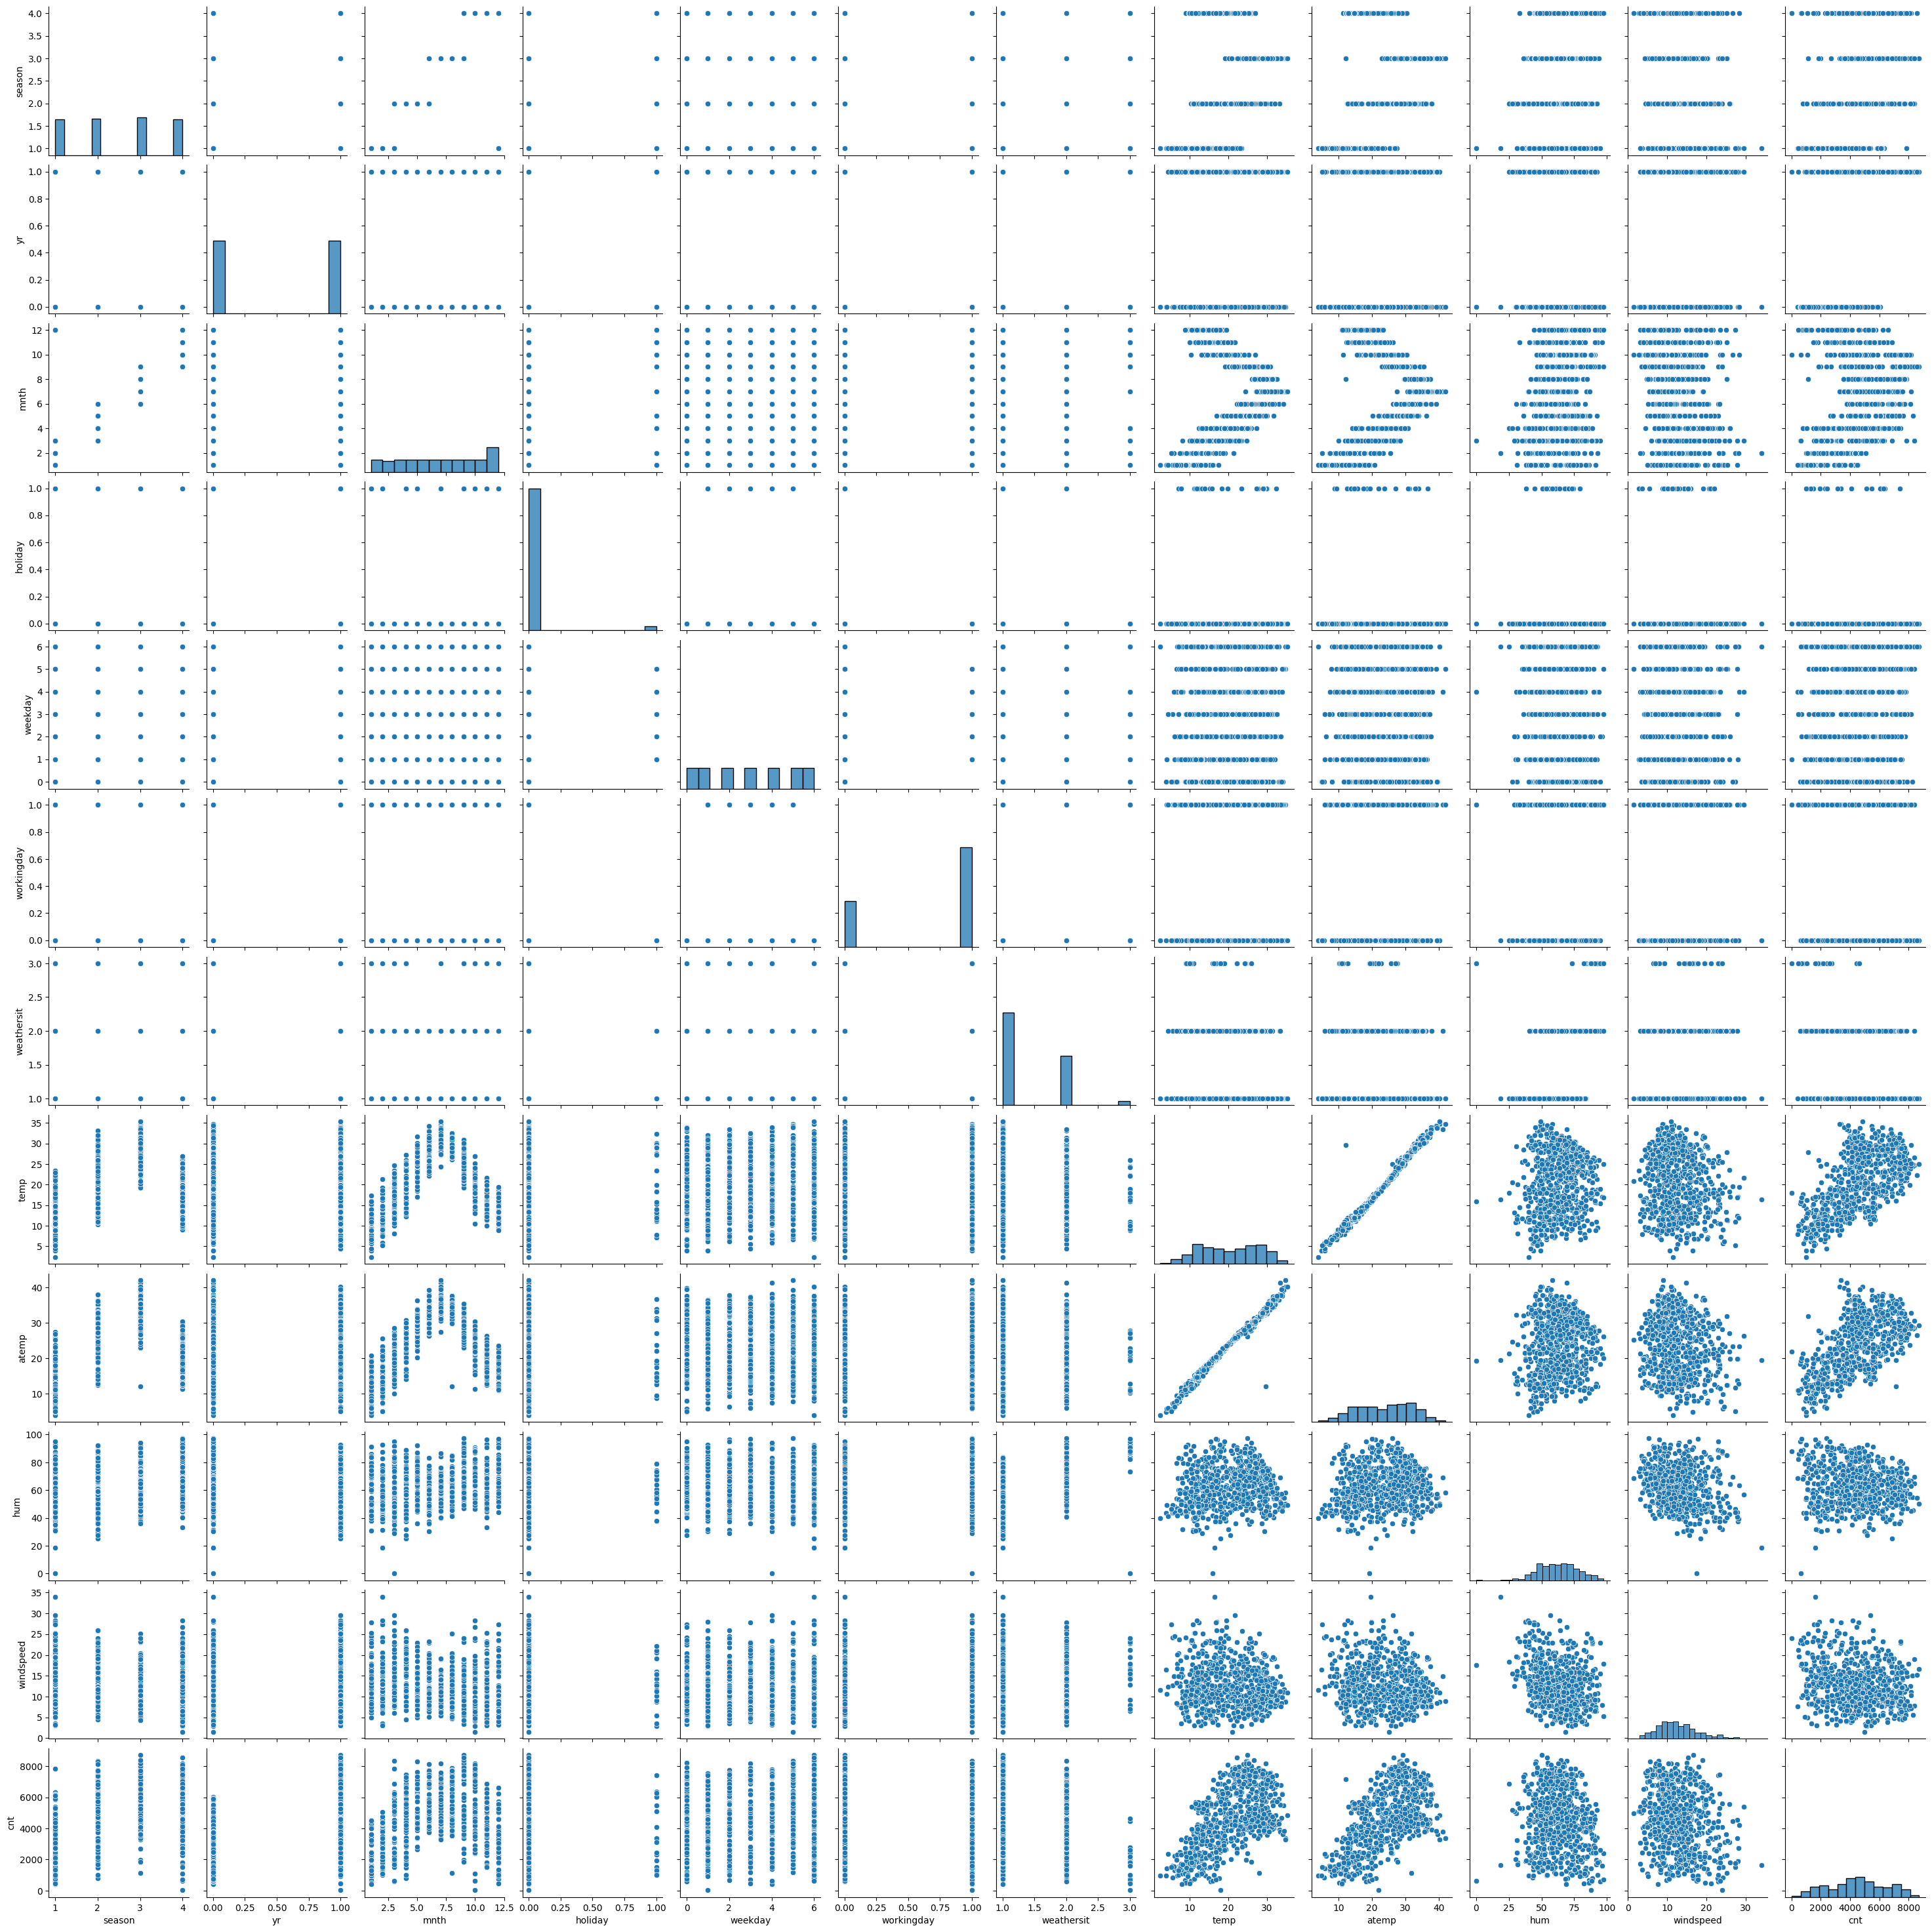

In [87]:
#for i in num_features:
sns.pairplot(df[num_features])
plt.show()

## Take Aways from Univariate:
1) Temp and ATemp:
There is a positive correlation when temperature increases the count of bike sharing increases. People  cboose to go out when temperature is good.
2) Humidity: 
There is a negative correlation when humidity increases the count of bike sharing decreases. If humidity is more then people stay in the home.
3) Non-Holiday, Working Days period, there is a more number of bike sharing counts.4) 
During Clear / few / partly coulds, people choosen for bike sharing People choose to go out when there is a clear / few / partly clouds.

## 3.3 BiVariate Analysis

Our main objective is to find the count of bike sharing based on certain input. Lets analyse the CNT feature with other input features

### 3.3.1 Numerical Features vs CNT

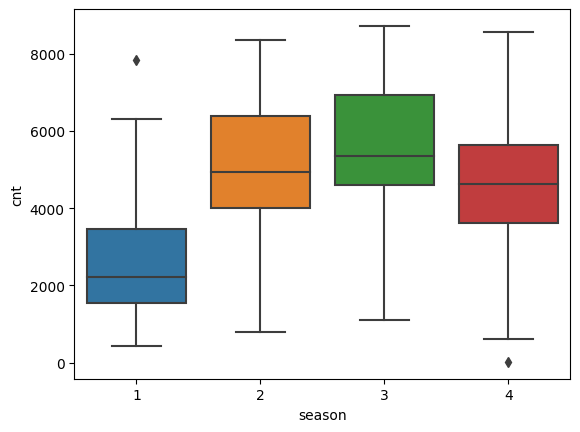

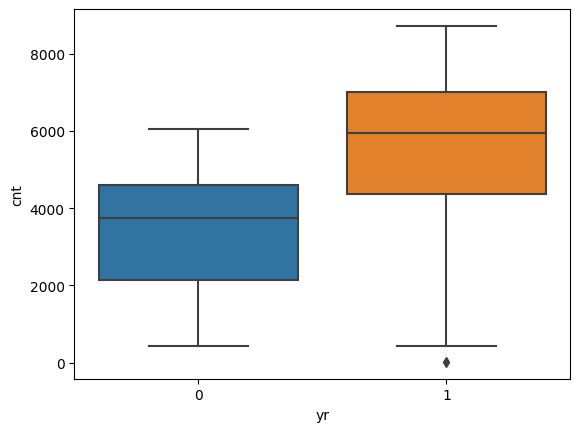

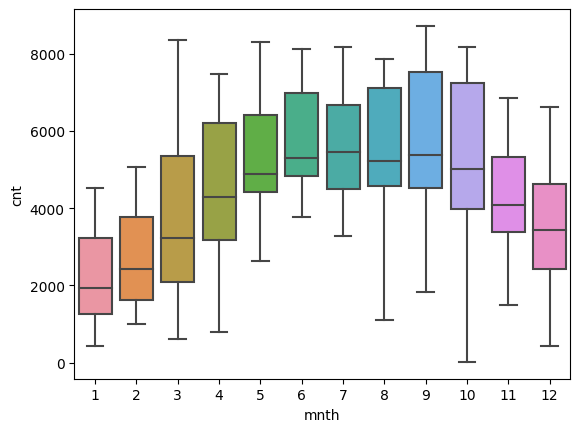

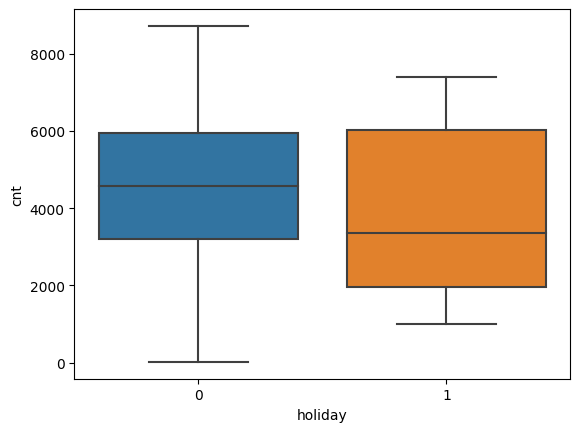

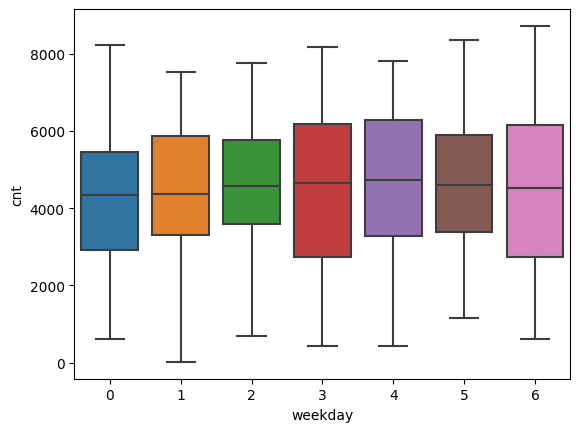

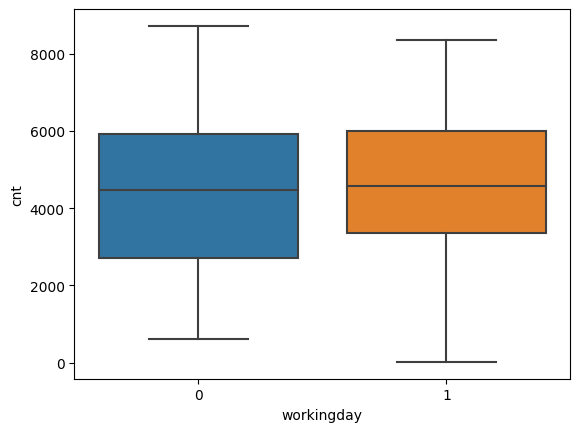

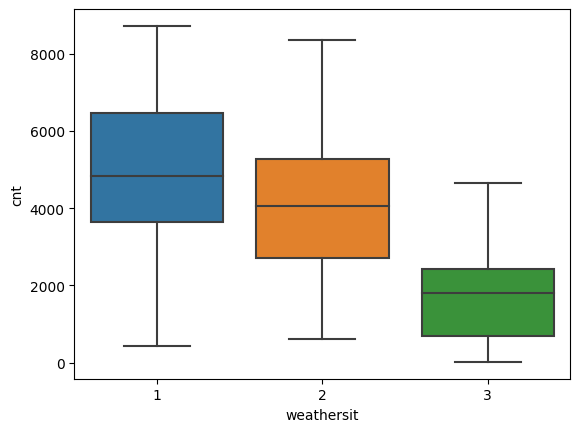

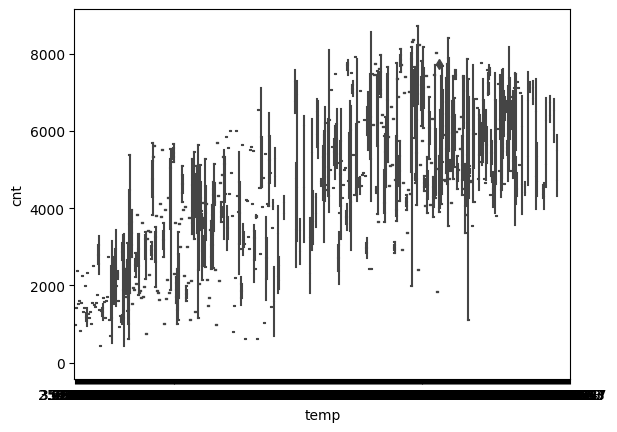

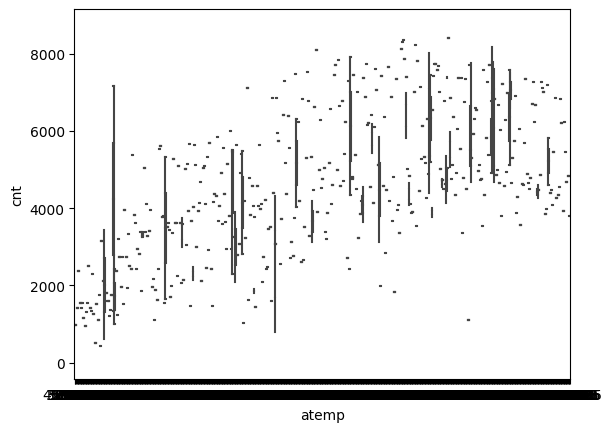

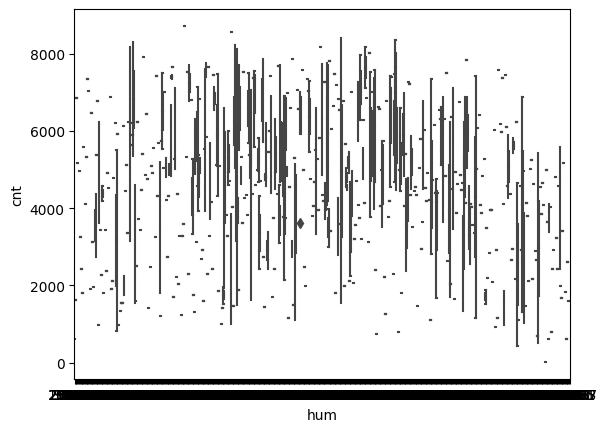

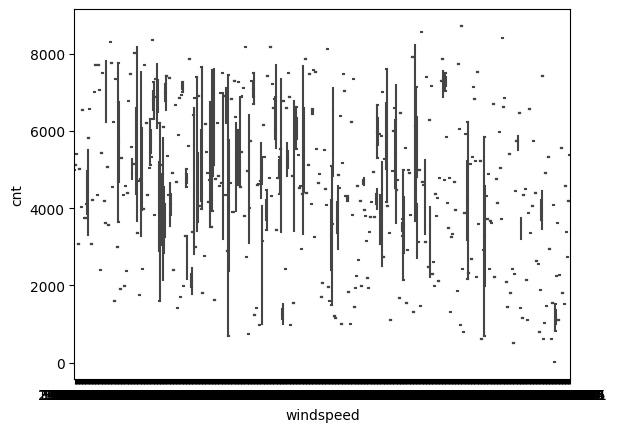

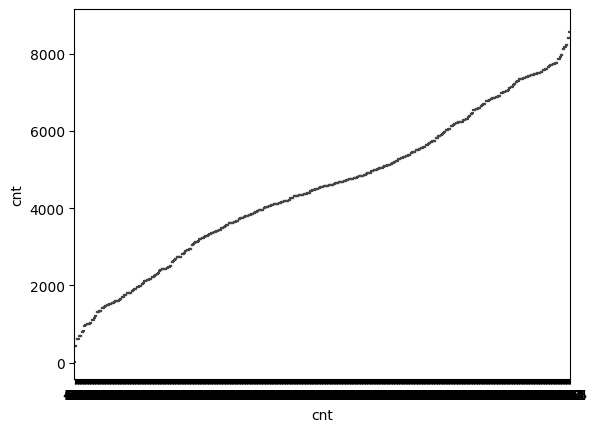

In [88]:
for i in num_features:
    sns.boxplot(x=df[i],y=df.cnt)
    plt.show()

### Observations:
- More bike sharing business happened during Fall and Summer season. Spring season has less bike sharing count.
- 2019 has more bike sharing than 2018 year. 2019 has a good business when compared with 2018 year
- There is a spike of business from month 5 to 10. Other months business is less when compared with month 5 to 10
- Business of bike sharing is more during non-holiday time. this might be people who are going to work are using the bike sharing.
- Bike sharing count is equally distributed across weekdays, workingday
- More bike sharing business happened during Clear, Few clouds, Partly cloudy, Partly cloudy

### 3.4 MultiVariate Analysis

Lets see the correlations against all numerical features using heat map

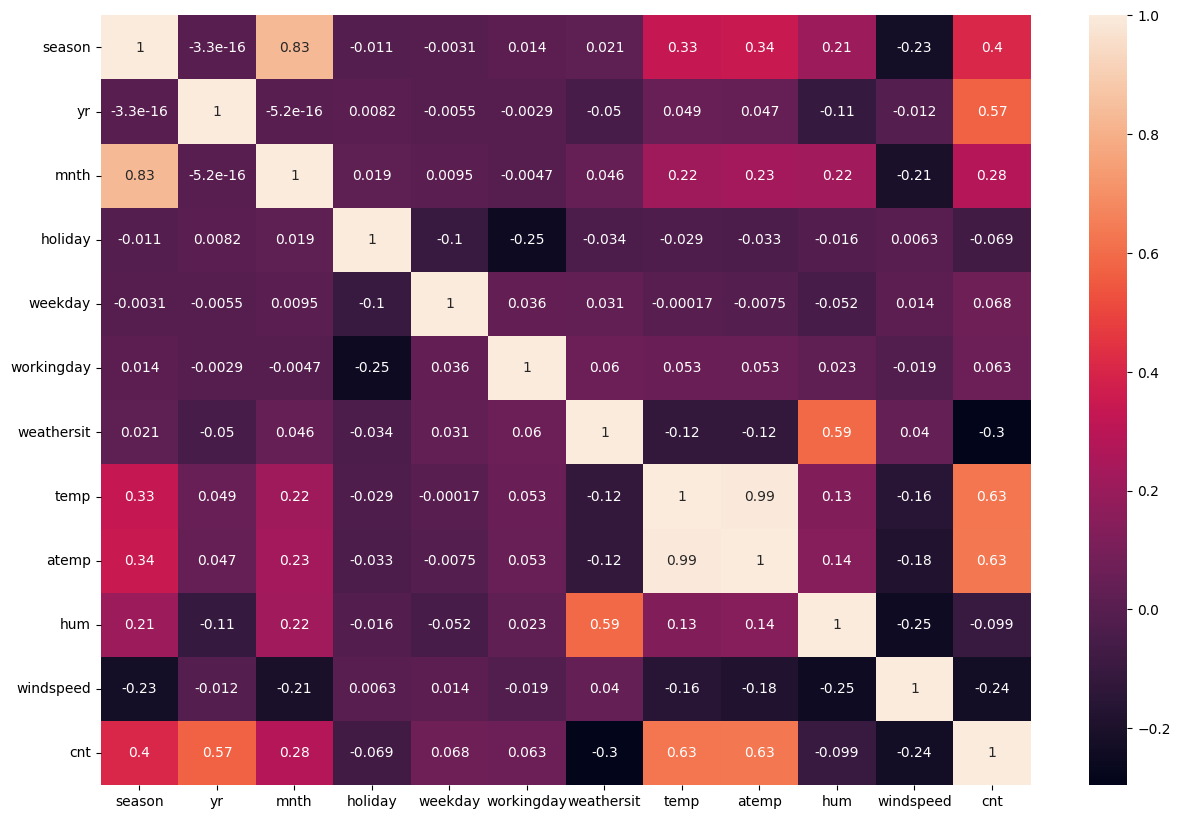

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_features].corr(),annot=True)
plt.show()

### Observations:

There are many correlations as per above heat map. Some of the top correlations are as follows:
1. season and month has highest correlation of 0.83
2. weathersit and hum has highest correlation of 0.63

Since there are good positive and negative correlations, we may have to check any multicolinearity effect on the data. Will do the validations of multicolinearity using VIF method.

## 4. Data Preparation

### 4.1 Dummy Variables

Lets convert the category variables where categories >2 in to numerical variables. This helps ML models perform better.

Will use drop_first to remove the first converted column from category.

In [90]:
# Let's drop the first column from status df using 'drop_first = True'
dum=columns=['season','mnth','weekday','weathersit']
for i in dum:
    dummies = pd.get_dummies(df[i], prefix=i, drop_first = True)
    dummies = dummies.astype(int)
    # Add the results to the original bike sharing dataframe
    df = pd.concat([df, dummies], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [91]:
#lets create the original cagetory variables as this variables not required and will be using the converted numerical variables for modelling
df = df.drop(['season','mnth','weekday','weathersit'],axis=1)
df.shape

(730, 30)

In [92]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    int32  
 9   season_3      730 non-null    int32  
 10  season_4      730 non-null    int32  
 11  mnth_2        730 non-null    int32  
 12  mnth_3        730 non-null    int32  
 13  mnth_4        730 non-null    int32  
 14  mnth_5        730 non-null    int32  
 15  mnth_6        730 non-null    int32  
 16  mnth_7        730 non-null    int32  
 17  mnth_8        730 non-null    int32  
 18  mnth_9        730 non-null    

### Observation:
As we can observe that, categorical variables are converted in to numerical as shown below

- Season --> Season_2,Season_3,Season_4

- mnth--> mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12

- weekday--> weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6

- weathersit --> weathersit_2, weathersit_3

Values for each converted variables are as follows

1) Season
- `0000` will correspond to `Spring`
- `0100` will correspond to `Summer`
- `0010` will correspond to `Fall`
- `0001` will correspond to `Winter`

2) mnth
- `000000000000` will correspond to `month 1`
- `010000000000` will correspond to `month 2`
- `001000000000` will correspond to `month 3`
- `000100000000` will correspond to `month 4`
- `000010000000` will correspond to `month 5`
- `000001000000` will correspond to `month 6`
- `000000100000` will correspond to `month 7`
- `000000010000` will correspond to `month 8`
- `000000001000` will correspond to `month 9`
- `000000000100` will correspond to `month 10`
- `000000000010` will correspond to `month 11`
- `000000000001` will correspond to `month 12`

3) weekday
- `0000000` will correspond to `Week Day 0`
- `0100000` will correspond to `Week Day 1`
- `0010000` will correspond to `Week Day 2`
- `0001000` will correspond to `Week Day 3`
- `0000100` will correspond to `Week Day 4`
- `0000010` will correspond to `Week Day 5`
- `0000001` will correspond to `Week Day 6`

4) weathersit
- `0000` will correspond to `Weather 1`
- `0100` will correspond to `Weather 2`
- `0010` will correspond to `Weather 3`
- `0001` will correspond to `Weather 4`

## 4.2 Splitting the Data into Training and Testing Sets

Lets split the data in to training and testing with 70 and 30 percent ratio.

In [94]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## 4.3 Rescaling the features on Train Data

There are the features which has different scaling information. It is important to rescale the features to have a comparable scale. Avoiding the rescaling will leads to coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. Let use scaling techniques to perform the scaling to the features. We will use Normalization technique (Min-Max scaling).

temp, atemp, hum, windspeed, cnt needs to performed scaling on this features.

If feature values are between o to 1 then we can ignore scaling as those are already in scaling range

In [95]:
#creating a object to store the MinMaxScaler function
scaler = MinMaxScaler()

In [96]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler_features = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#lets consider train data 
df_train[scaler_features] = scaler.fit_transform(df_train[scaler_features])

In [97]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


### Observation:
As we can see that, temp, atemp, hum, windspeed , cnt got rescaled between 0 to 1

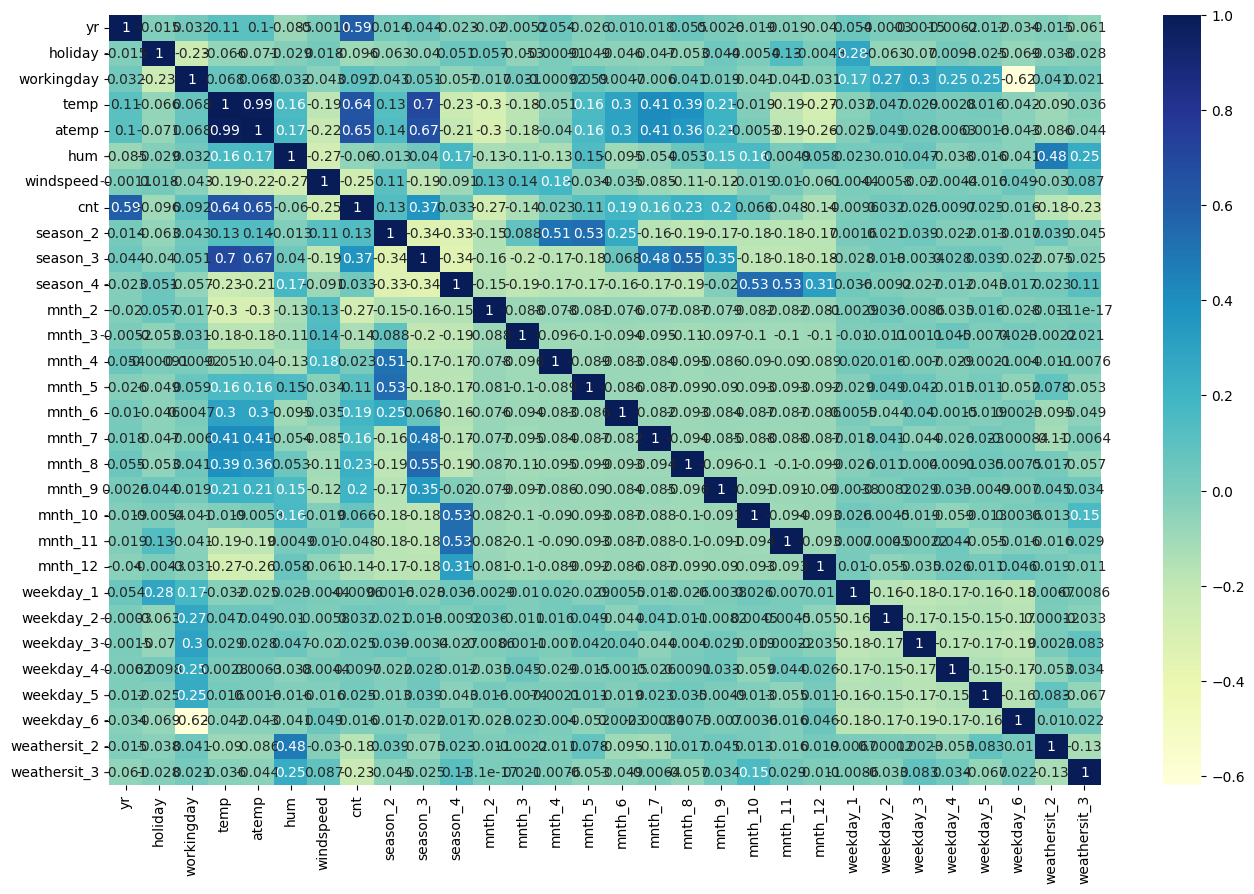

In [98]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observations:
Noticed that, there are few features which has positive and negative. There might be chance of multicolinearity. Lets find out.

## Divide X and Y for modeling purpose

In [99]:
#prepare x_traina and y_train data
y_train = df_train.pop('cnt')
X_train = df_train

## 5.Modeling with Manual Feature Selection

## 5.1 Model 1: Apply with all features

Lets use `statsmodels`to predict the bike sharing count.

We should add constant to statsmodel as a mandatory step otherwise model will fit the regression line through the origin by default

In [100]:
#Build a linear model
#Model 1

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           0.175618
yr              0.232208
holiday        -0.042394
workingday      0.043879
temp            0.401322
atemp           0.050628
hum            -0.151812
windspeed      -0.184388
season_2        0.086796
season_3        0.048580
season_4        0.153968
mnth_2          0.030389
mnth_3          0.063853
mnth_4          0.062565
mnth_5          0.087257
mnth_6          0.060862
mnth_7          0.023289
mnth_8          0.078641
mnth_9          0.144371
mnth_10         0.070260
mnth_11         0.020783
mnth_12         0.016994
weekday_1      -0.009946
weekday_2      -0.007753
weekday_3       0.005823
weekday_4       0.001806
weekday_5       0.011556
weekday_6       0.054533
weathersit_2   -0.061030
weathersit_3   -0.256697
dtype: float64

In [101]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.42e-181
Time:                        22:22:39   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1756      0.030      5.777   

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
26,weekday_5,inf
25,weekday_4,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
4,temp,67.12
0,const,60.22
5,atemp,56.09


### Observation: 

Model 1 has got good scores

- R square has got good score which is 0.85. 
- Adjusted R-Squared got 0.84 ( so not overfit)
- F-Statistic also got good score  which is 99.However t6

There are features which P-Value >0.05 and VIF values are infinite which leads to insignificant pat and not good for modelingtern. Better to drop the features to make the model run significantly. 

Lets drop the features where P-value >0.05 and VIF >5. Below are the features which falls on the criteria

- weekday_1_5
- atemp
- season_3
- mnth_8
- mnth_7
- mnth_6
- mnth_11

## 5.2 Model 2: Dropping high p-Value and VIF features

In [103]:
#drop the high p-value and VIF features
X_train_m2 = X_train.drop(['atemp','season_3','mnth_6','mnth_7','mnth_8','mnth_11','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5'],axis=1)

In [104]:
#Build a linear model

X_train_lm_m2 = sm.add_constant(X_train_m2)

lr_2 = sm.OLS(y_train, X_train_lm_m2).fit()

lr_2.params

const           0.181390
yr              0.229150
holiday        -0.055522
workingday      0.045041
temp            0.571094
hum            -0.169295
windspeed      -0.193214
season_2        0.071162
season_4        0.134010
mnth_2          0.002779
mnth_3          0.026283
mnth_4          0.025262
mnth_5          0.031641
mnth_9          0.110315
mnth_10         0.034330
mnth_12        -0.001513
weekday_6       0.055286
weathersit_2   -0.055638
weathersit_3   -0.249633
dtype: float64

In [105]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.28e-186
Time:                        22:22:40   Log-Likelihood:                 515.12
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     491   BIC:                            -911.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1814      0.030      5.963   

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_m2.values, i) for i in range(X_train_lm_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.49
7,season_2,2.96
11,mnth_4,2.13
8,season_4,2.10
12,mnth_5,2.09
5,hum,1.94
3,workingday,1.88
16,weekday_6,1.79
4,temp,1.69
14,mnth_10,1.65


## Observation:
Scores for R square, Adjusted R square didn't reduced much. 
All features are controlled and under <5 in VIF. However, there are features which has high p-values. Lets drop mnth_12 which has high P-Value

## 5.3 Model 3: Dropping mnth_12 feature

In [107]:
#Model m3
X_train_m3 = X_train_m2.drop(['mnth_12'],axis=1)
#Build a linear model

X_train_lm_m3 = sm.add_constant(X_train_m3)

lr_m3 = sm.OLS(y_train, X_train_lm_m3).fit()

#lr_m3.params
print(lr_m3.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.14e-187
Time:                        22:22:40   Log-Likelihood:                 515.11
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     492   BIC:                            -918.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1811      0.030      5.985   

In [108]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_m3.values, i) for i in range(X_train_lm_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.03
7,season_2,2.95
11,mnth_4,2.12
12,mnth_5,2.09
8,season_4,1.95
5,hum,1.92
3,workingday,1.88
15,weekday_6,1.79
4,temp,1.59
16,weathersit_2,1.56


## Observation:
Scores for R square, Adjusted R square didn't reduced much. 
All features are controlled and under <5 in VIF. However, there are features which has high p-values. Lets drop mnth_2 which has high P-Value

## 5.4 Model 4: Dropping mnth_2 feature

In [109]:
#Model m4
X_train_m4 = X_train_m3.drop(['mnth_2'],axis=1)
#Build a linear model

import statsmodels.api as sm
X_train_lm_m4 = sm.add_constant(X_train_m4)

lr_m4 = sm.OLS(y_train, X_train_lm_m4).fit()

#lr_m4.params
print(lr_m4.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.18e-188
Time:                        22:22:40   Log-Likelihood:                 515.10
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     493   BIC:                            -924.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1823      0.029      6.207   

In [110]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_m4.values, i) for i in range(X_train_lm_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.78
7,season_2,2.94
11,mnth_5,2.08
10,mnth_4,2.08
5,hum,1.92
3,workingday,1.88
14,weekday_6,1.79
8,season_4,1.75
15,weathersit_2,1.56
13,mnth_10,1.48


## Observation:
Scores for R square, Adjusted R square didn't reduced much. 
All features are controlled and under <5 in VIF. However, there are features which has high p-values. Lets drop mnth_4 which has high P-Value

## 5.5 Model 5: Dropping mnth_4 feature

In [111]:
#Model m5
X_train_m5 = X_train_m4.drop(['mnth_4'],axis=1)
#Build a linear model

import statsmodels.api as sm
X_train_lm_m5 = sm.add_constant(X_train_m5)

lr_m5 = sm.OLS(y_train, X_train_lm_m5).fit()

#lr_m5.params
print(lr_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.59e-189
Time:                        22:22:40   Log-Likelihood:                 514.39
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     494   BIC:                            -929.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1847      0.029      6.302   

In [112]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_m5.values, i) for i in range(X_train_lm_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.51
5,hum,1.92
3,workingday,1.88
13,weekday_6,1.78
8,season_4,1.74
7,season_2,1.60
14,weathersit_2,1.56
10,mnth_5,1.51
12,mnth_10,1.48
4,temp,1.36


## Observation:
Scores for R square, Adjusted R square didn't reduced much. 
All features are controlled and under <5 in VIF. However, there are features which has high p-values. Lets drop mnth_5 which has high P-Value

## 5.6 Model 6: Dropping mnth_5 feature

In [113]:
#Model m6
X_train_m6 = X_train_m5.drop(['mnth_5'],axis=1)
#Build a linear model

import statsmodels.api as sm
X_train_lm_m6 = sm.add_constant(X_train_m6)

lr_m6 = sm.OLS(y_train, X_train_lm_m6).fit()

#lr_m6.params
print(lr_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.76e-190
Time:                        22:22:40   Log-Likelihood:                 513.80
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     495   BIC:                            -934.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1814      0.029      6.222   

In [114]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_m6.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_m6.values, i) for i in range(X_train_lm_m6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.90
3,workingday,1.88
5,hum,1.88
12,weekday_6,1.78
8,season_4,1.74
13,weathersit_2,1.56
11,mnth_10,1.48
4,temp,1.36
14,weathersit_3,1.25
6,windspeed,1.19


## Observation:
Scores for R square, Adjusted R square didn't reduced much. 
All features are controlled and under <5 in VIF. However, there are features which has high p-values. Lets drop mnth_3 which has high P-Value

## 5.7 Model 7: Dropping mnth_3 feature

In [115]:
#Model m7
X_train_m7 = X_train_m6.drop(['mnth_3'],axis=1)
#Build a linear model

import statsmodels.api as sm
X_train_lm_m7 = sm.add_constant(X_train_m7)

lr_m7 = sm.OLS(y_train, X_train_lm_m7).fit()

#lr_m7.params
print(lr_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.45e-191
Time:                        22:22:40   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     496   BIC:                            -938.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1859      0.029      6.421   

In [116]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_m7.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_m7.values, i) for i in range(X_train_lm_m7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.07
3,workingday,1.88
5,hum,1.88
11,weekday_6,1.78
8,season_4,1.68
12,weathersit_2,1.56
10,mnth_10,1.48
4,temp,1.30
13,weathersit_3,1.25
6,windspeed,1.19


## Observation:
Scores for R square, Adjusted R square didn't reduced much. 
All features are controlled and under <5 in VIF and p-value <0.05. Lets consider this as a best model.

## 6. Residual Analysis of Train Data

In [117]:
y_train_m7 = lr_m7.predict(X_train_lm_m7)

Text(0.5, 0, 'Errors')

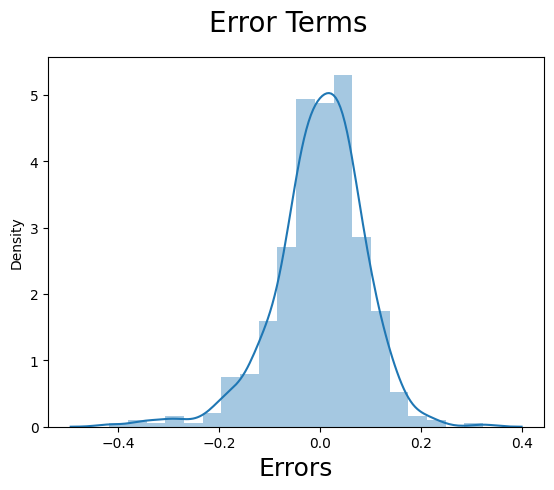

In [118]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_m7), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observations:
As we can see that, erros are normally distributed. Hence we can proceed with the model and predict for test data.

## 7. Predict using the Final Model

## 7.1 Scaling:
temp, atemp, hum, windspeed, cnt needs to performed scaling on this features.

Note: Should only transform the scaling for test data, We should use train scaling fit. Model should learn from train scaling fit 

In [119]:
#Scaling the test features
df_test[scaler_features] = scaler.transform(df_test[scaler_features])

## 7.2 Divide X and Y for modeling purpose

In [120]:
#prepare y_test and x_test
y_test = df_test.pop('cnt')
X_test = df_test

In [121]:
#drop the const before considering / filtering the test features based on train final features.
X_train_noc = X_train_lm_m7.drop(['const'], axis=1)

In [122]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_lm = X_test[X_train_noc.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

In [123]:
# Making predictions
#X_test_lm = X_test_lm.drop(['const'], axis=1)
y_pred = lr_m7.predict(X_test_lm)

## 7.3 Calculate R2 scored

In [124]:
r2score = r2_score(y_test, y_pred)
r2score

0.8119271748602944

## 7.3 Calculate Adj R2 scored

In [125]:
adjscore1 = 1 - ((1 - r2score) * (X_test_lm.shape[0] - 1)) / (X_test_lm.shape[0] - X_test_lm.shape[1] - 1)
adjscore1                                                                   

0.7990202162722754

Text(0, 0.5, 'y_pred')

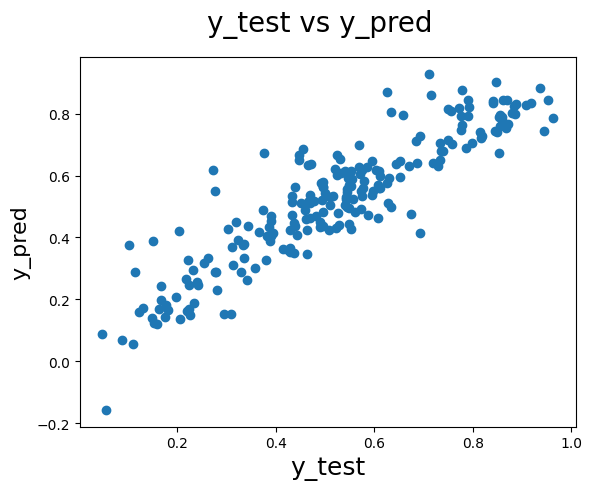

In [126]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

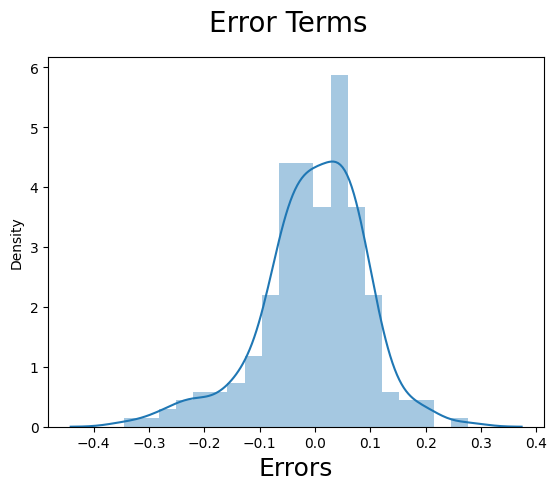

In [127]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observations:

R squared shows a good metric score. Below are the scores comparisons

| Feature Selection   | DataSet  | R-Squared  | Adj. R-Squared  |
|------------|------------|------------|------------|
| Manual | Train| 0.844 |0.840 |
| Manual | Test| 0.812 |0.799 |

Error graph for Train and Test are normally distributed and good fit for model prediction

## 8.Modeling with Automatic Feature Selection

Lets use RFE (Recursive Feature Elimination) alogrithm to select the best features.

In [128]:
# Running RFE with the output number of the variable equal to 14
#load the linearregression function
lm1 = LinearRegression()

#fit the data
lm1.fit(X_train, y_train)
#run RFE
rfe = RFE(estimator=lm1, n_features_to_select=14)             # running RFE
#fit RFE
rfe = rfe.fit(X_train, y_train)

In [129]:
#display the features along with ranking 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 4),
 ('mnth_6', False, 6),
 ('mnth_7', False, 9),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('weekday_1', False, 12),
 ('weekday_2', False, 13),
 ('weekday_3', False, 15),
 ('weekday_4', False, 16),
 ('weekday_5', False, 14),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [130]:
#features which are supported (14 features)
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [131]:
#features which are eliminated
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [132]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [133]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [134]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.24e-192
Time:                        22:22:41   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.88
12,weekday_6,1.79
8,season_4,1.72
4,temp,1.59
13,weathersit_2,1.57
11,mnth_10,1.49
9,mnth_8,1.46
7,season_2,1.38


## Observation:
Noticed that, P-values and VIF values are with in the range and R squared also got a good score (0.848). We can proceed with predictions

In [136]:
#X_train_lm = X_train_rfe.drop(['const'], axis=1)
y_train_rfe = lm1.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

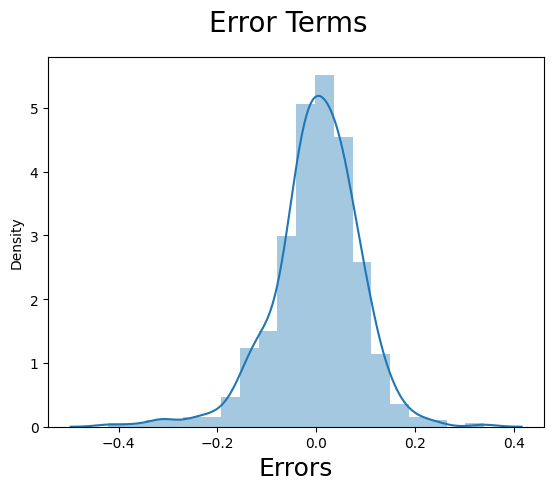

In [137]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observation:
Errors are normally distributed. Hence we can proceed with further predictions.

## Scaling the Test data

In [138]:
#re splitting because df_test doesn't contain 'cnt' variable as we removed it in manual feature selections models. 
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_test[scaler_features] = scaler.transform(df_test[scaler_features])

In [139]:
y_test = df_test.pop('cnt')
X_test = df_test

In [140]:
#dropping const from train. We will create a constant seperately for test data
X_train_noc = X_train_rfe.drop(['const'], axis=1)

In [141]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_lm = X_test[X_train_noc.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

In [142]:
# Making predictions
#X_test_lm = X_test_lm.drop(['const'], axis=1)
y_pred = lm1.predict(X_test_lm)

## R squared evaluation

In [143]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
r2score

0.8139594321774226

## Adj. R squared evaluation

Formula for Adj. Rsquared is as 
1 - ((1 - r2) * (n - 1)) / (n - p - 1)
n refers to number of observations
r2 refers to r2 score
p refers to number of predictors

In [144]:
# calculating Adj R squared 
adjscore = 1 - ((1 - r2score) * (X_test_lm.shape[0] - 1)) / (X_test_lm.shape[0] - X_test_lm.shape[1] - 1)
adjscore

0.8002125921905326

Text(0, 0.5, 'y_pred')

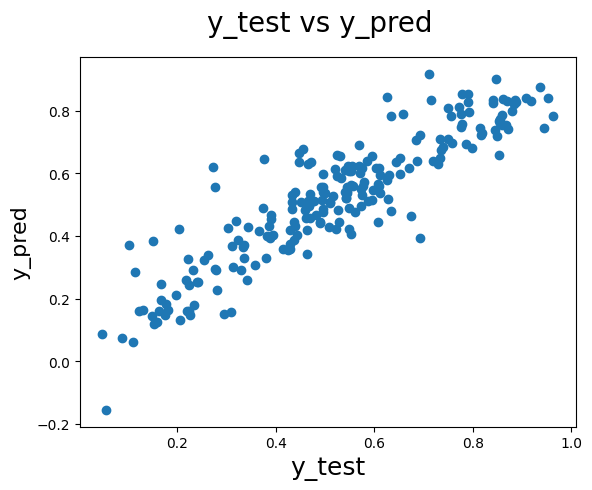

In [145]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

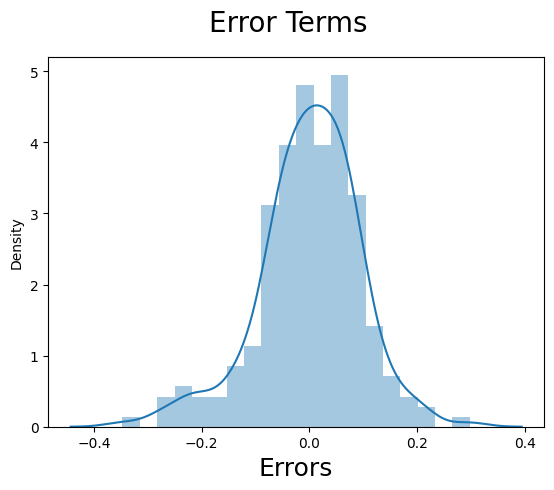

In [146]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observations:

R squared shows a good metric score. Below are the scores comparisons

| Feature Selection   | DataSet  | R-Squared  | Adj. R-Squared  |
|------------|------------|------------|------------|
| Automatic | Train| 0.848 |0.845 |
| Automatic | Test| 0.813 |0.800 |

Error graph for Train and Test are normally distributed and good fit for model prediction

# Conclusion

<b> Manual and Automatic Feature Selection Strategy : </b>

Both Manual and Automatic recommends same features to find the demand.

Demand on the bikes will be based on following features. 
- Working Day
- Humidity
- Winter Season
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Temperature
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Windspeed
- Summer
- Holiday
- Year

All coefficients of above features are positive, which means coefficient of any unit increases the bike hire will get increased.


Note: I have used ML StatsModel to predict the bike sharing. Have tested with Sklearn models and provided the same predictions.